# 3)

## a)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def binom_likelihood(p: float, tirada: np.ndarray):
    n_caras = np.sum(tirada)
    n = len(tirada)
    return stats.binom.pmf(n_caras, n, p)

def posterior_binomial(prior_funcion, n: int, k: int, samples: int):
    tirada = np.array([1] * k + [0] * (n - k))
    theta = np.linspace(0, 1, samples)
    likelihood = np.array([binom_likelihood(t, tirada) for t in theta])
    prior = prior_funcion(theta)
    posterior = likelihood * prior / np.sum((likelihood * prior)[:-1] * np.diff(theta))
    return theta, posterior


## b)

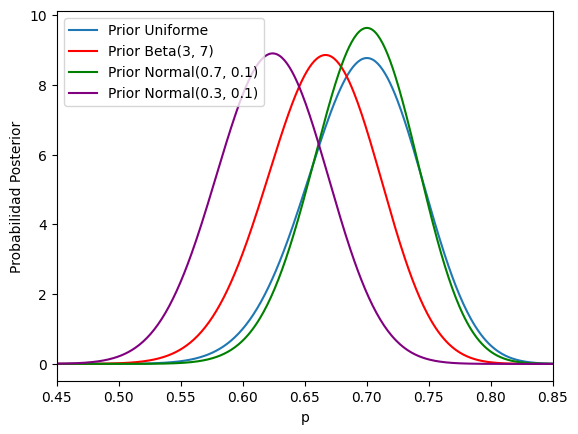

In [9]:
n = 100
k = 70
samples = 1000
# prior beta(1, 1) (uniforme)
prior_uniforme = lambda p_estimada: stats.beta.pdf(p_estimada , 1, 1)
plt.plot(*posterior_binomial(prior_uniforme, n, k, samples), label='Prior Uniforme')

# prior beta(3, 7)
prior_beta = lambda p_estimada: stats.beta.pdf(p_estimada , 3, 7)
plt.plot(*posterior_binomial(prior_beta, n, k, samples), label = "Prior Beta(3, 7)", color='red')

# prior normal(0.7, 0.1)
prior_normal = lambda p_estimada: stats.norm.pdf(p_estimada, 0.7, 0.1)
plt.plot(*posterior_binomial(prior_normal, n, k, samples), label = "Prior Normal(0.7, 0.1)", color='green')

# prior normal(0.5, 0.1)
prior_func_normal = lambda p_estimada: stats.norm.pdf(p_estimada, 0.3, 0.1)
plt.plot(*posterior_binomial(prior_func_normal, n, k, samples), label = "Prior Normal(0.3, 0.1)", color='purple')

plt.xlabel('p')
plt.ylabel('Probabilidad Posterior')
plt.xlim(0.45, 0.85)
plt.legend()
plt.show()


Aumentar la varianza hace que se acerque a la uniforme (no informativa)

## c)

Voy a probar con todos los priors

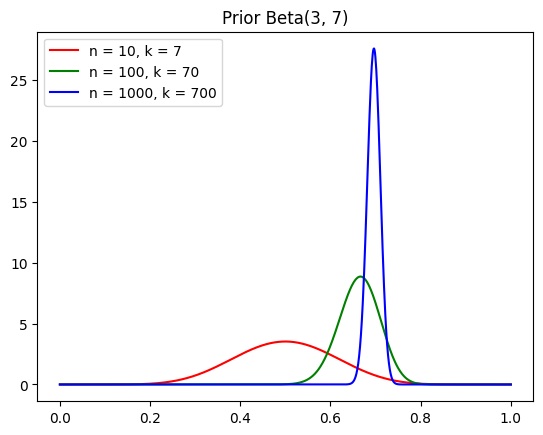

In [10]:
samples = 1000

plt.plot(*posterior_binomial(prior_beta, 10, 7, samples), label='n = 10, k = 7', color='red')
plt.plot(*posterior_binomial(prior_beta, 100, 70, samples), label='n = 100, k = 70', color='green')
plt.plot(*posterior_binomial(prior_beta, 1000, 700, samples), label='n = 1000, k = 700', color='blue')
plt.title("Prior Beta(3, 7)")
plt.legend()
plt.show()

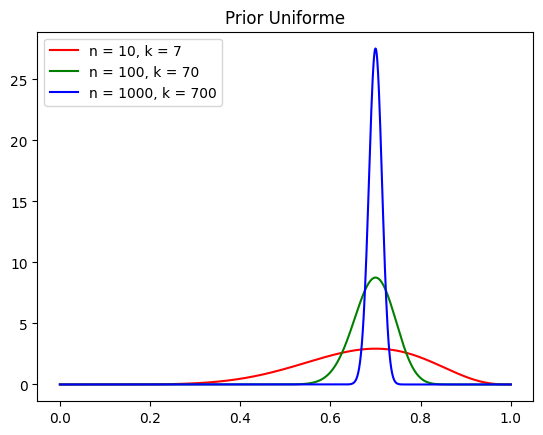

In [11]:
plt.plot(*posterior_binomial(prior_uniforme, 10, 7, samples), label='n = 10, k = 7', color='red')
plt.plot(*posterior_binomial(prior_uniforme, 100, 70, samples), label='n = 100, k = 70', color='green')
plt.plot(*posterior_binomial(prior_uniforme, 1000, 700, samples), label='n = 1000, k = 700', color='blue')
plt.title("Prior Uniforme")
plt.legend()
plt.show()


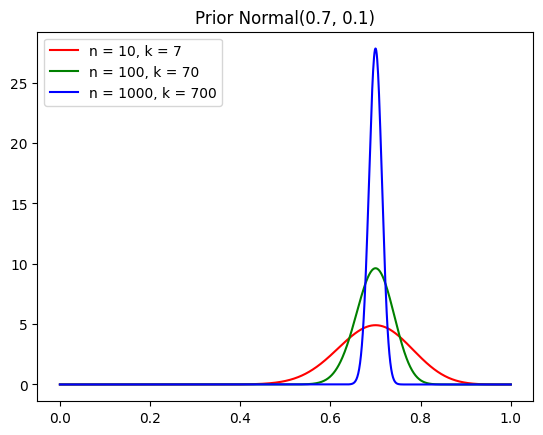

In [12]:
plt.plot(*posterior_binomial(prior_normal, 10, 7, samples), label='n = 10, k = 7', color='red')
plt.plot(*posterior_binomial(prior_normal, 100, 70, samples), label='n = 100, k = 70', color='green')
plt.plot(*posterior_binomial(prior_normal, 1000, 700, samples), label='n = 1000, k = 700', color='blue')
plt.title("Prior Normal(0.7, 0.1)")
plt.legend()
plt.show()

La probabilidad posterior se concentra en el valor real de p a medida que aumenta n

# 4)

## a) grafico

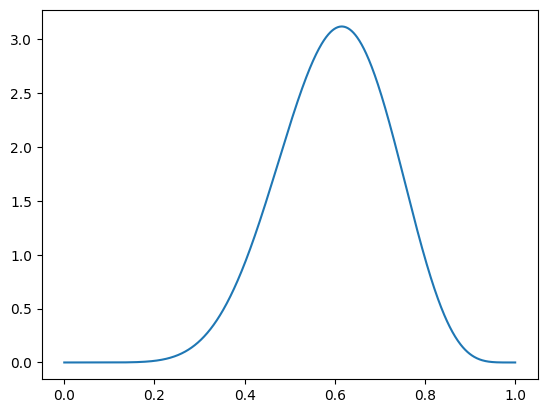

In [13]:
alpha = 9
beta = 6

x = np.linspace(0, 1, 1000)
y = stats.beta.pdf(x, alpha, beta)

plt.plot(x, y)
plt.show()

## b)

Con la funcion anterior:

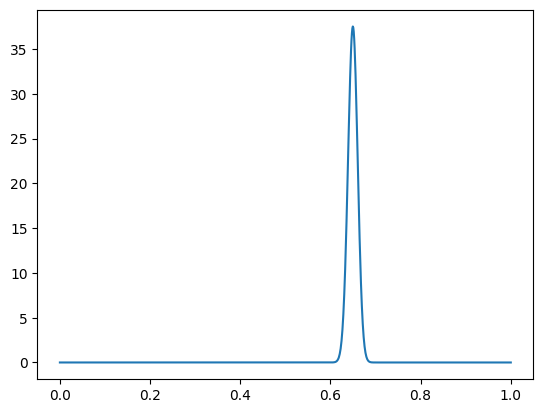

In [16]:
n = 1000
k = 650
samples = 1000
prior_beta = lambda p_estimada: stats.beta.pdf(p_estimada , alpha, beta)
plt.plot(*posterior_binomial(prior_beta, n, k, samples))
#plt.xlim(0.6, 0.7)
plt.show()

A mano en la hoja:

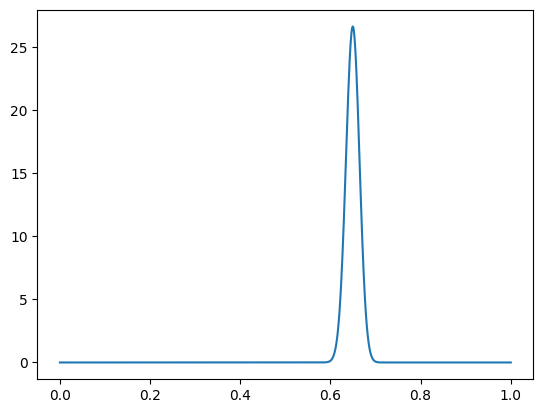

In [17]:
# Sin normalizar
alpha = 659
beta = 356

x = np.linspace(0, 1, 1000)
y = stats.beta.pdf(x, alpha, beta)

plt.plot(x, y)
# plt.xlim(0.6, 0.7)
plt.show()

Cuando aumenta la cantidad de observaciones disminuye la importancia de los alpha y beta originales (los del prior)

# 9)

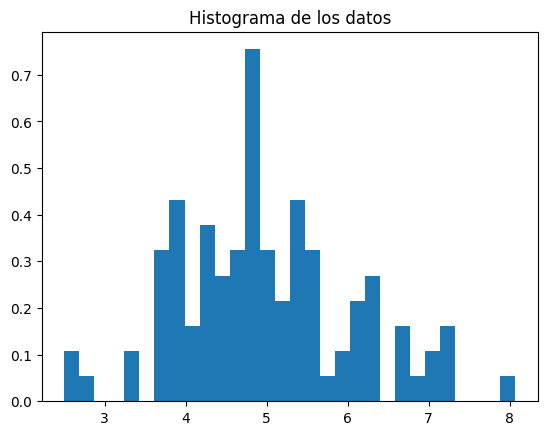

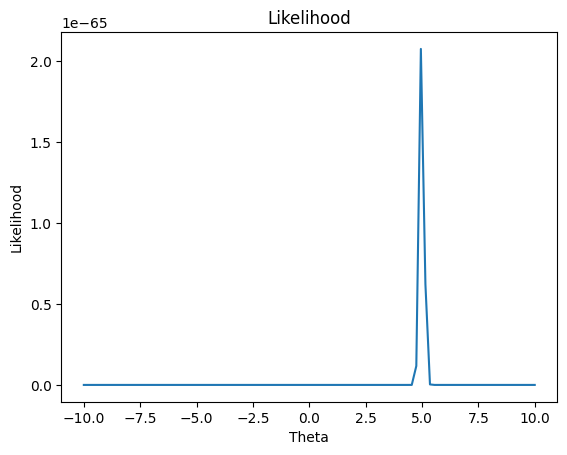

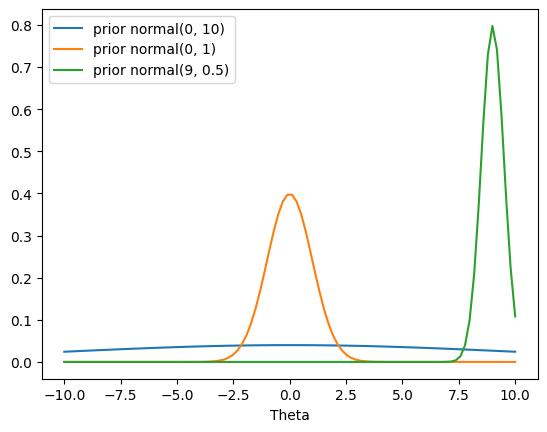

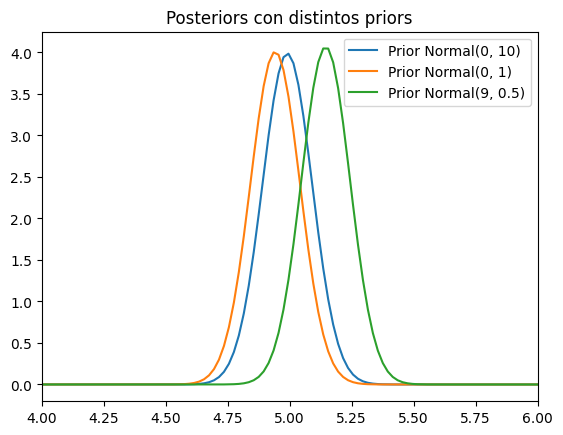

In [58]:
def normal_likelihood(mu: float, sigma: float, x: np.ndarray):
    return np.prod(stats.norm.pdf(x, mu, sigma))

# para theta: mu
def posterior_normal(prior_funcion, sigma: float, x: np.ndarray, thetas_array: np.ndarray):
    thetas = np.linspace(thetas_array[0], thetas_array[-1], 1000)
    likelihood = np.array([normal_likelihood(theta, sigma, x) for theta in thetas])
    prior = prior_funcion(thetas)
    # posterior = likelihood * prior / np.sum((likelihood * prior)[:-1] * np.diff(theta))
    posterior = likelihood * prior / np.trapz(likelihood * prior, thetas)
    return thetas, posterior

mu = 5
sigma = 1

n = 100

# graficar la likelihood
x = np.random.normal(mu, sigma, n)
plt.hist(x, bins=30, density=True)
plt.title("Histograma de los datos")
plt.show()

thetas = np.linspace(-10, 10, n)
y = [normal_likelihood(theta, sigma, x) for theta in thetas]
plt.plot(thetas, y)
plt.title("Likelihood")
plt.xlabel("Theta")
plt.ylabel("Likelihood")
plt.show()

# graficar el prior
prior_normal = lambda thetas: stats.norm.pdf(thetas, 0, 10)
prior_normal2 = lambda thetas: stats.norm.pdf(thetas, 0, 1)
prior_normal3 = lambda thetas: stats.norm.pdf(thetas, 9, 0.5)

plt.plot(thetas, prior_normal(thetas), label = "prior normal(0, 10)")
plt.plot(thetas, prior_normal2(thetas), label = "prior normal(0, 1)")
plt.plot(thetas, prior_normal3(thetas), label = "prior normal(9, 0.5)")
plt.xlabel("Theta")
plt.legend()
plt.show()

# graficar la posterior
plt.plot(*posterior_normal(prior_normal, sigma, x, thetas), label='Prior Normal(0, 10)')
plt.plot(*posterior_normal(prior_normal2, sigma, x, thetas), label='Prior Normal(0, 1)')
plt.plot(*posterior_normal(prior_normal3, sigma, x, thetas), label='Prior Normal(9, 0.5)')
plt.title("Posteriors con distintos priors")
plt.xlim(4,6)
plt.legend()
plt.show()

Es como que el prior no tuvo relevancia, supongo que son muchos datos, pero son solo 100.

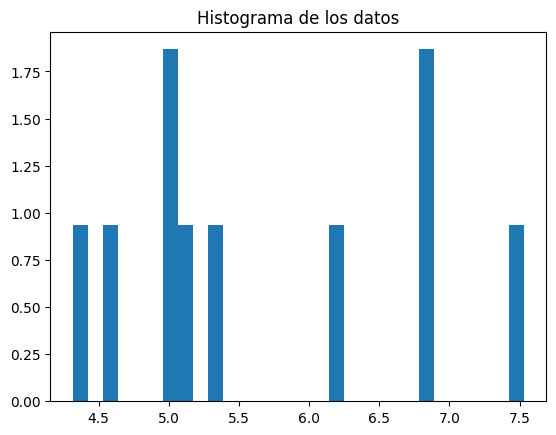

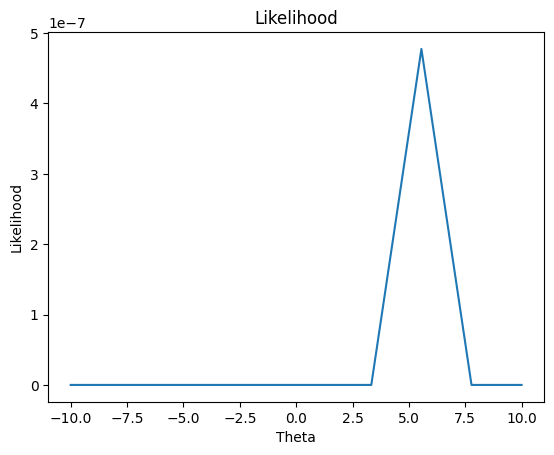

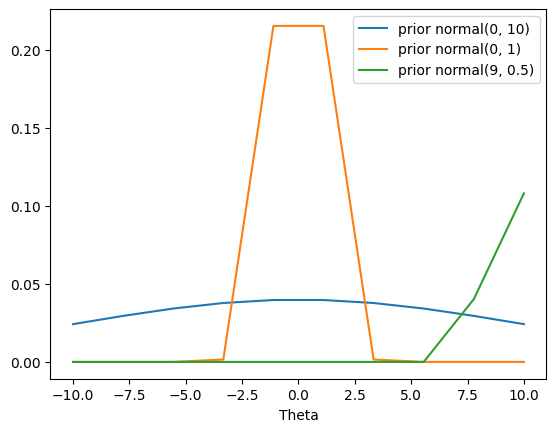

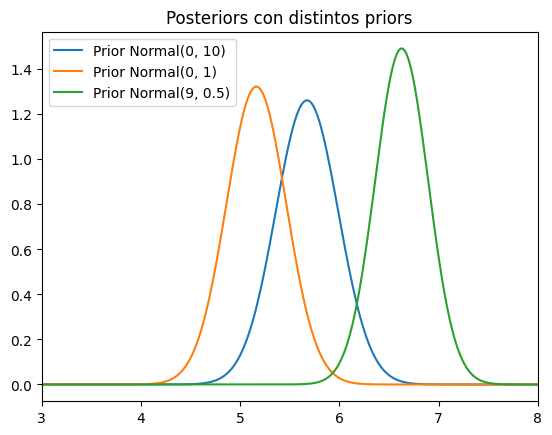

In [59]:
n = 10

# graficar la likelihood
x = np.random.normal(mu, sigma, n)
plt.hist(x, bins=30, density=True)
plt.title("Histograma de los datos")
plt.show()

thetas = np.linspace(-10, 10, n)
y = [normal_likelihood(theta, sigma, x) for theta in thetas]
plt.plot(thetas, y)
plt.title("Likelihood")
plt.xlabel("Theta")
plt.ylabel("Likelihood")
plt.show()

# graficar el prior
prior_normal = lambda thetas: stats.norm.pdf(thetas, 0, 10)
prior_normal2 = lambda thetas: stats.norm.pdf(thetas, 0, 1)
prior_normal3 = lambda thetas: stats.norm.pdf(thetas, 9, 0.5)

plt.plot(thetas, prior_normal(thetas), label = "prior normal(0, 10)")
plt.plot(thetas, prior_normal2(thetas), label = "prior normal(0, 1)")
plt.plot(thetas, prior_normal3(thetas), label = "prior normal(9, 0.5)")
plt.xlabel("Theta")
plt.legend()
plt.show()

# graficar la posterior
plt.plot(*posterior_normal(prior_normal, sigma, x, thetas), label='Prior Normal(0, 10)')
plt.plot(*posterior_normal(prior_normal2, sigma, x, thetas), label='Prior Normal(0, 1)')
plt.plot(*posterior_normal(prior_normal3, sigma, x, thetas), label='Prior Normal(9, 0.5)')
plt.title("Posteriors con distintos priors")
plt.xlim(3,8)
plt.legend()
plt.show()

Puede ser, se mueve un poco la posterior.

# 10)
Se toma una muestra de 𝑛 películas y se registra su duración en minutos. La duración promedio
de las 𝑛 películas es 𝑦¯ = 125 minutos. Asumir que las duraciones están distribuidas normalmente
con media 𝜃 desconocida y desvío estándar 20 minutos. Suponer un prior normal para 𝜃 con media
100 y desvío estándar 40.

## c)


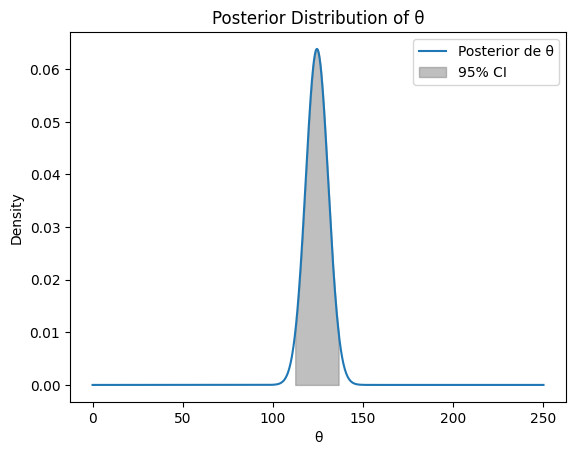

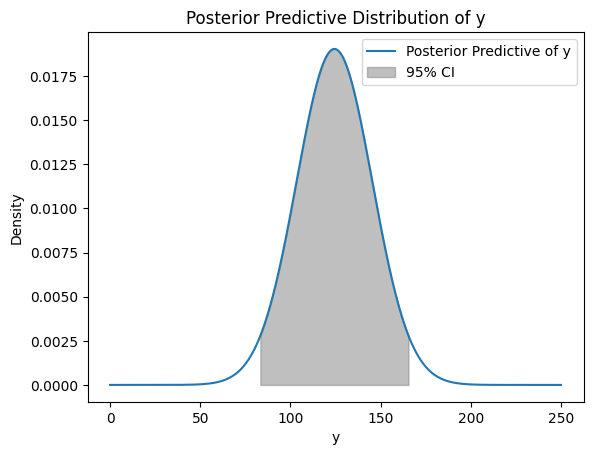

Intervalo de confianza del 95% para θ: (112.14644595716695, 136.6340418477111)
Intervalo de confianza del 95% para y: (83.32329713983809, 165.45719066503995)


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

n = 10

mu_theta = (100 + 500 * n) / (1 + 4 * n)
sigma_theta = np.sqrt(1600 / (1 + 4 * n))

x = np.linspace(0, 250, 1000)
y_posterior = stats.norm.pdf(x, mu_theta, sigma_theta)

percentil_025_theta = stats.norm.ppf(0.025, mu_theta, sigma_theta)
percentil_975_theta = stats.norm.ppf(0.975, mu_theta, sigma_theta)

plt.plot(x, y_posterior, label='Posterior de θ')
plt.fill_between(x, 0, y_posterior, where=(x >= percentil_025_theta) & (x <= percentil_975_theta), color='gray', alpha=0.5, label='95% CI')
plt.title('Posterior Distribution of θ')
plt.legend()
plt.xlabel('θ')
plt.ylabel('Density')
plt.show()

sigma_y = np.sqrt(400 + 1600 / (1 + 4 * n))

y_predictive = stats.norm.pdf(x, mu_theta, sigma_y)

percentil_025_y = stats.norm.ppf(0.025, mu_theta, sigma_y)
percentil_975_y = stats.norm.ppf(0.975, mu_theta, sigma_y)

plt.plot(x, y_predictive, label='Posterior Predictive of y')
plt.fill_between(x, 0, y_predictive, where=(x >= percentil_025_y) & (x <= percentil_975_y), color='gray', alpha=0.5, label='95% CI')
plt.title('Posterior Predictive Distribution of y')
plt.legend()
plt.xlabel('y')
plt.ylabel('Density')
plt.show()

print(f'Intervalo de confianza del 95% para θ: ({percentil_025_theta}, {percentil_975_theta})')
print(f'Intervalo de confianza del 95% para y: ({percentil_025_y}, {percentil_975_y})')

## d)

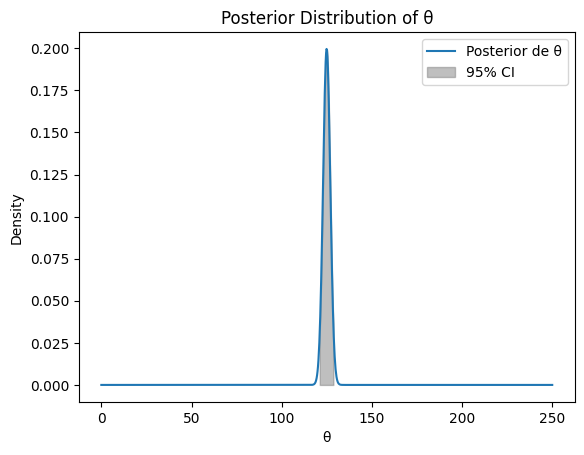

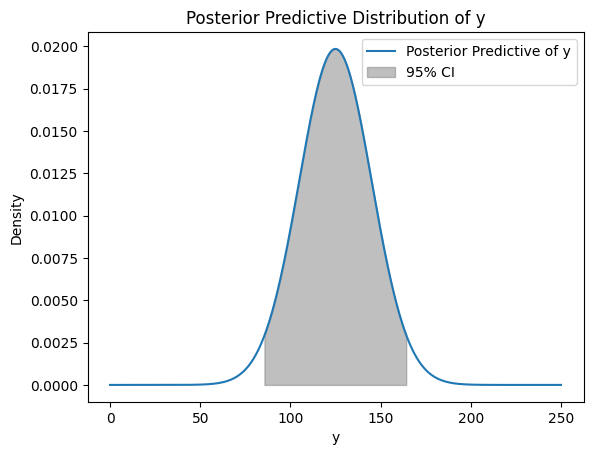

Intervalo de confianza del 95% para θ: (121.02261863299769, 128.85269308770057)
Intervalo de confianza del 95% para y: (85.54335367374861, 164.33195804694964)


In [21]:
n = 100

mu_theta = (100 + 500 * n) / (1 + 4 * n)
sigma_theta = np.sqrt(1600 / (1 + 4 * n))

x = np.linspace(0, 250, 1000)
y_posterior = stats.norm.pdf(x, mu_theta, sigma_theta)

percentil_025_theta = stats.norm.ppf(0.025, mu_theta, sigma_theta)
percentil_975_theta = stats.norm.ppf(0.975, mu_theta, sigma_theta)

plt.plot(x, y_posterior, label='Posterior de θ')
plt.fill_between(x, 0, y_posterior, where=(x >= percentil_025_theta) & (x <= percentil_975_theta), color='gray', alpha=0.5, label = '95% CI')
plt.title('Posterior Distribution of θ')
plt.legend()
plt.xlabel('θ')
plt.ylabel('Density')
plt.show()

sigma_y = np.sqrt(400 + 1600 / (1 + 4 * n))

y_predictive = stats.norm.pdf(x, mu_theta, sigma_y)

percentil_025_y = stats.norm.ppf(0.025, mu_theta, sigma_y)
percentil_975_y = stats.norm.ppf(0.975, mu_theta, sigma_y)

plt.plot(x, y_predictive, label='Posterior Predictive of y')
plt.fill_between(x, 0, y_predictive, where=(x >= percentil_025_y) & (x <= percentil_975_y), color='gray', alpha=0.5, label = '95% CI')
plt.title('Posterior Predictive Distribution of y')
plt.legend()
plt.xlabel('y')
plt.ylabel('Density')
plt.show()

print(f'Intervalo de confianza del 95% para θ: ({percentil_025_theta}, {percentil_975_theta})')
print(f'Intervalo de confianza del 95% para y: ({percentil_025_y}, {percentil_975_y})')

La posterior predictive no cambia casi con n.  
La posterior de $\theta$ se angosta con mayor n

# 11)
Una empresa de tecnología quiere comparar el tiempo de respuesta de dos versiones de su
software de gestión: una versión antigua y una versión optimizada. Se midió el tiempo de respuesta
(en segundos) de una tarea específica realizada por el software en diferentes computadoras y la
idea es comparar el tiempo promedio $\mu_0$ de la versión antigua con el tiempo promedio $\mu_1$ de la
versión optimizada. Para la versión antigua se midió en 32 computadoras y se obtuvo un promedio
muestral de 1.013 segundos y un desvío estándar muestral de 0.24. Para las 36 computadoras con
la versión moderna, el promedio muestral fue de 1.173 y el desvío estándar muestral de 0.20.  

## a) 
Asumiendo que los tiempos de respuesta del software antiguo fueron tomados de manera
aleatoria de una distribución normal con media $\mu_0$ y varianza $\sigma_0^2$
¿cuál es la posterior de $\mu_0$?.  
De manera análoga usar las mediciones del software optimizado para obtener la distribución
posterior de $\mu_1$. Asumir un prior uniforme en ($\mu_0$, $\mu_1$, $log (\sigma_0)$, $log (\sigma_1)$).

## b)

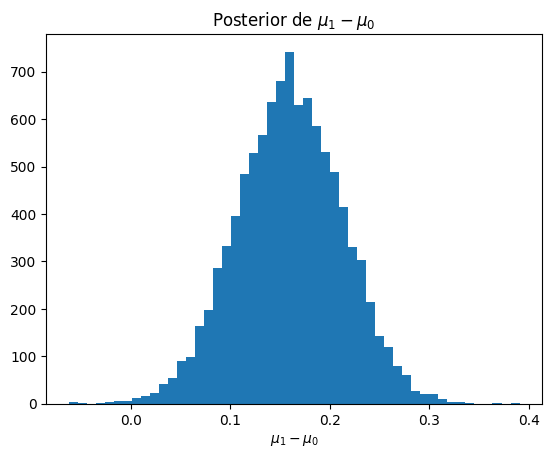

In [27]:
mu_0_mean = 1.013
mu_0_var = 0.0018
mu_1_mean = 1.173
mu_1_var = 0.00111111

n_samples = 10_000

mu_0_samples = np.random.normal(mu_0_mean, np.sqrt(mu_0_var), n_samples)
mu_1_samples = np.random.normal(mu_1_mean, np.sqrt(mu_1_var), n_samples)

dif_samples = mu_1_samples - mu_0_samples

plt.hist(dif_samples, bins = 50)
plt.title('Posterior de $\\mu_1 - \\mu_0$')
plt.xlabel('$\\mu_1 - \\mu_0$')
plt.show()


In [28]:
lower_bound = np.percentile(dif_samples, 2.5)
upper_bound = np.percentile(dif_samples, 97.5)

print(f'Intervalo de probabilidad del 95% para $\\mu_1 - \\mu_0$: ({lower_bound}, {upper_bound})')

Intervalo de probabilidad del 95% para $\mu_1 - \mu_0$: (0.05457760105514675, 0.26184476637621207)


Como la diferencia es mayor a cero (cero no está en el intervalo de probabilidad) podemos decir que la diferencia entre los tiempos de respuesta es significativa y el software antiguo es mejor que el nuevo.